# Desafio 7
Neste desafio, vamos praticar regressão, criando um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

## Regressão

In [3]:
# Score atingindo no Codenation 93,43
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
import numpy as np 
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # folha de estilos
%matplotlib inline
#print(plt.style.available)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format


In [5]:
dataset_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" )
dataset_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )


Text(0.5, 1.0, 'Distribuição das notas')

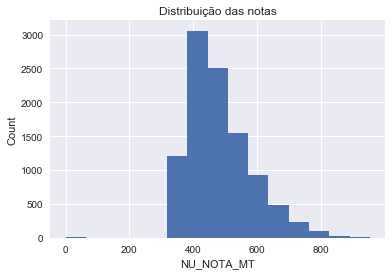

In [185]:
# Histograma de notas
plt.hist(dataset_train['NU_NOTA_MT'], bins = 15) # motifica a escala
plt.xlabel('NU_NOTA_MT')
plt.ylabel('Count')
plt.title('Distribuição das notas')

### Verificar  quais features tem uma maior correlação com (NU_NOTA_MT)

In [186]:
dataset_train.corr()['NU_NOTA_MT'].sort_values(ascending=False).head(15)

NU_NOTA_MT                1.00
NU_NOTA_CN                0.58
NU_NOTA_CH                0.53
NU_NOTA_LC                0.49
NU_NOTA_REDACAO           0.38
TP_DEPENDENCIA_ADM_ESC    0.37
NU_NOTA_COMP3             0.35
NU_NOTA_COMP5             0.34
NU_NOTA_COMP4             0.34
NU_NOTA_COMP2             0.34
NU_NOTA_COMP1             0.30
CO_MUNICIPIO_NASCIMENTO   0.11
CO_UF_NASCIMENTO          0.11
CO_MUNICIPIO_PROVA        0.11
CO_MUNICIPIO_RESIDENCIA   0.11
Name: NU_NOTA_MT, dtype: float64

In [187]:
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']


In [188]:
# Valores com nan
dataset_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

In [189]:
# Preenchendo com valores 0 células NAN das features com maior correlação
def preencher_zeros(data):
    for item in features_corr:
        data[item] = data[item].fillna(0)
        #print(data[item])
    return data

In [190]:
data_train = preencher_zeros(dataset_train)
data_test = dataset_test.fillna(0)

# Valores com nan
data_train[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

In [191]:
data_train.corr()['NU_NOTA_MT'].sort_values(ascending=False).head(15)

NU_NOTA_MT               1.00
NU_NOTA_LC               0.94
TP_PRESENCA_LC           0.92
TP_PRESENCA_MT           0.92
NU_NOTA_CN               0.91
NU_NOTA_CH               0.90
NU_NOTA_REDACAO          0.88
TP_PRESENCA_CN           0.87
TP_PRESENCA_CH           0.87
NU_NOTA_COMP4            0.87
NU_NOTA_COMP2            0.86
NU_NOTA_COMP3            0.85
NU_NOTA_COMP5            0.72
NU_NOTA_COMP1            0.30
TP_DEPENDENCIA_ADM_ESC   0.26
Name: NU_NOTA_MT, dtype: float64

### Criando a matrix de correlação 

Text(0.5, 1, 'Matriz de Correlação')

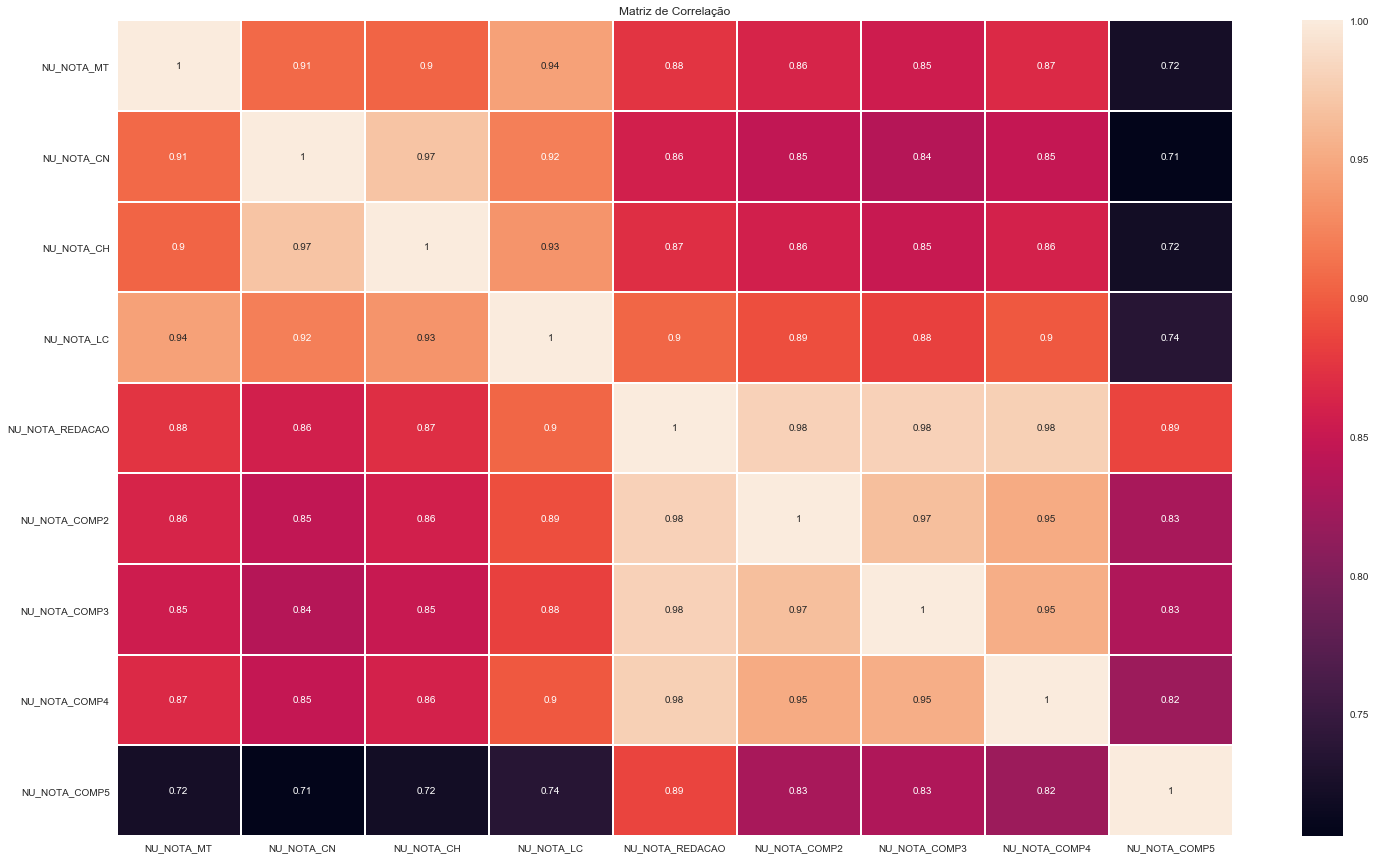

In [192]:
corr = data_train[features_corr].corr()
ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10}, linewidths = 1.0)
plt.title('Matriz de Correlação')

In [193]:
y_train = data_train['NU_NOTA_MT']
x_train = data_train[features]
x_test = data_test[features]


#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()   # normalizando
#x_train = sc.fit_transform(x_train)  
#x_test = sc.transform(x_test)

In [194]:
pipeline_RFR = Pipeline([('scaler',StandardScaler()),('RandomForestRegressor', RandomForestRegressor())])

In [195]:
result_randorize = RandomizedSearchCV(estimator = pipeline_RFR,
                                 param_distributions = {},
                                 n_iter=15,
                                 n_jobs=2, 
                                 cv = 5,
                                 return_train_score=True, 
                                 verbose=0)

In [196]:
np.any(np.isnan(y_train))

False

In [197]:
result_randorize.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('RandomForestRegressor',
                                              RandomForestRegressor(bootstrap=True,
                                                                    ccp_alpha=0.0,
                                                                    criterion='mse',
                                                                    max_depth=None,
                                                                    max_features='auto',
                                                                    max_leaf_nodes=None,
                                       

In [198]:
y_pred_test = result_randorize.predict(x_test)
y_pred_test

array([421.203, 443.122, 590.631, ..., 681.805, 490.522,   0.   ])

In [199]:
y_pred_train = result_randorize.predict(x_train)
y_pred_train

array([432.112, 466.023,   0.   , ..., 436.285, 414.982, 461.536])

In [200]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 16.66947662
MSE: 613.86821051
RMSE: 24.77636395


In [201]:
answer_csv = pd.DataFrame({'NU_INSCRICAO': dataset_test.NU_INSCRICAO, 'NU_NOTA_MT': y_pred_test})
answer_csv = answer_csv.round(2)
answer_csv.to_csv('answer.csv', index=False, header=True)

In [202]:
answer_csv.describe()

,NU_NOTA_MT
count,"4,576.00"
mean,355.97
std,220.16
min,0.00
25%,0.00
50%,444.93
75%,485.54
max,859.30
